In [16]:
import pandas as pd
price_file = '/home/userroot/dev/zms/etl/index_300_align_day_test/sh601816.csv'
price_df = pd.read_csv(price_file)

In [17]:
close_price = price_df.iloc[:,-6:-5]
len(price_df.columns)

1546

In [18]:
import torch
t = torch.load('/home/userroot/dev/zms/predict_output.pt')
print(t.shape)

(255, 1, 1544)


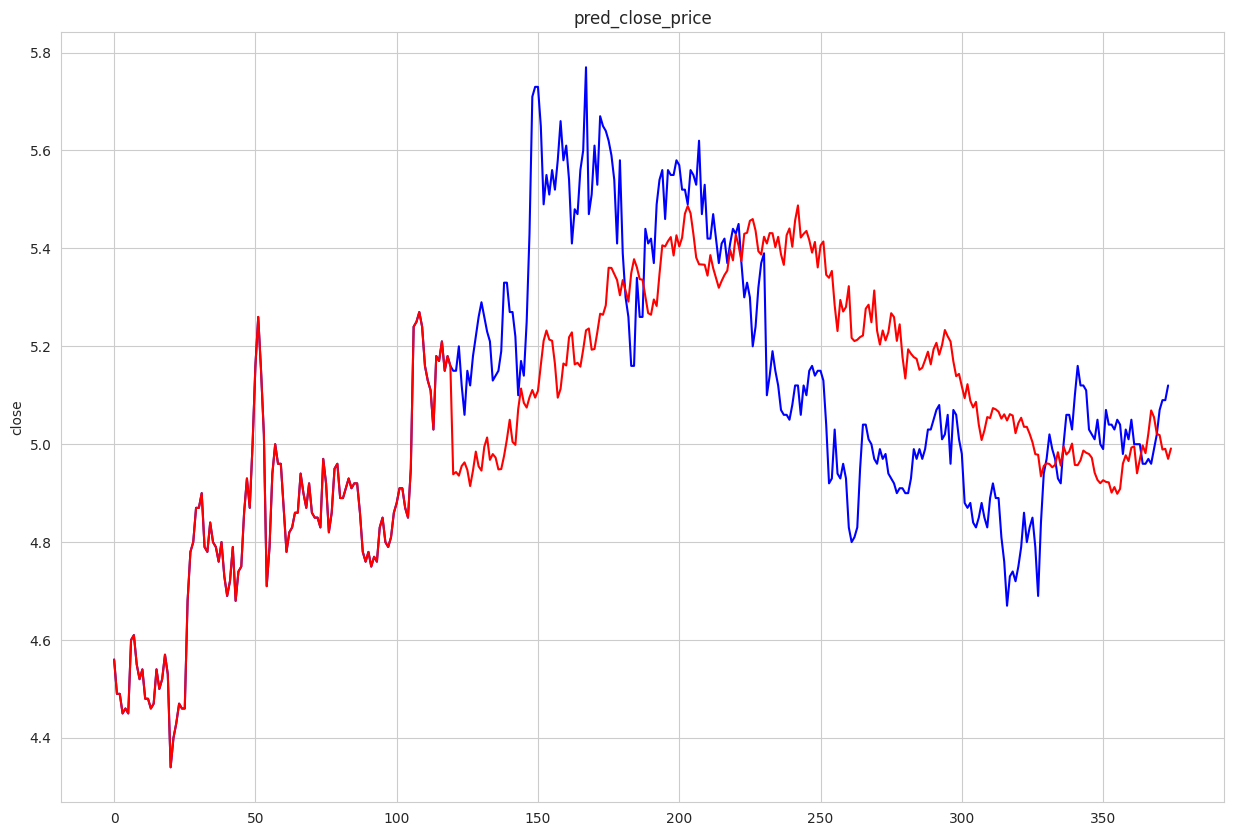

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")

start_pos = 1
seq_len = 120
pred_len = 1
rows = 2
target_col = -6
step = pred_len

skip = 4 
origin = close_price
#pred = pred_close_price
#fig, axes = plt.subplots(nrows=rows, ncols=1, figsize=(15, 10))
#plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(figsize=(15, 10))

N_origin = origin.shape[0]
N = t.shape[0]
i_step = step
pred_tensor = torch.tensor(t)
indices = torch.arange(0, N, i_step).long()
selected_tensor = torch.index_select(pred_tensor, dim=0, index=indices)
selected_tensor = selected_tensor.reshape(-1, pred_tensor.shape[2])

i = 0
i = i*step
df = pd.DataFrame(selected_tensor)
pred_close_price = pd.DataFrame({'close' :df.iloc[:,target_col].values})
pred_close_price = pd.concat([close_price[i:i+seq_len], pred_close_price],ignore_index=True)

#pred_close_price = pd.concat([pred_close_price, tail],ignore_index=True)
sns.lineplot(data=origin, x=range(origin.shape[0]) , y='close', color = 'blue', ax=ax)
sns.lineplot(data=pred_close_price,  x=range(pred_close_price.shape[0]) , y='close', color = 'red',ax=ax)
# step_v = pred_len  # 每隔个单位
# x_ticks = np.arange(seq_len, N_origin, step_v)
# for tick in x_ticks:
#     ax.vlines(tick, 4, 6, colors='r', linestyles='--')  # 垂直线颜色为红色，虚线样式



# Adding title
plt.title('pred_close_price')

# Display the plot
plt.show()

In [237]:
import numpy as np
N = 2
np.arange(0, 10, N)

array([0, 2, 4, 6, 8])

In [233]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

start_pos = 1
seq_len = 60
pred_len = 5
rows = 80
target_col = -6
step = 10

origin = close_price
pred = pred_close_price
fig, axes = plt.subplots(nrows=rows, ncols=1, figsize=(15, 200))
#plt.figure(figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    i = i*step
    df = pd.DataFrame(t[i,:,:])
    pred_close_price = pd.DataFrame({'close' :df.iloc[:,target_col].values})
    pred_close_price = pd.concat([close_price[i:i+seq_len], pred_close_price],ignore_index=True)

    #pred_close_price = pd.concat([pred_close_price, tail],ignore_index=True)
    sns.lineplot(data=origin[i:i+(seq_len+pred_len+seq_len)],x=range(seq_len+pred_len+seq_len), y='close', color = 'blue', ax=ax)
    sns.lineplot(data=pred_close_price, x=range(seq_len+pred_len), y='close', color = 'red',ax=ax)


# Adding title
plt.title('pred_close_price')

# Display the plot
plt.show()

ValueError: Length of range vectors must match length of `data` when both are used, but `data` has length 90 and the vector passed to `x` has length 65.

Error in callback <function flush_figures at 0x7f400e7a3520> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [220]:
N = t.shape[0]
i_step = 5
t = torch.tensor(t)
indices = torch.arange(0, N, i_step).long()
selected_tensor = torch.index_select(t, dim=0, index=indices)

/tmp/ipykernel_851739/907176474.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t)


In [221]:
selected_tensor.shape

torch.Size([63, 5, 1544])

In [214]:
indices = torch.arange(0, N, i_step).long()
indices


tensor([  0,  60, 120, 180])

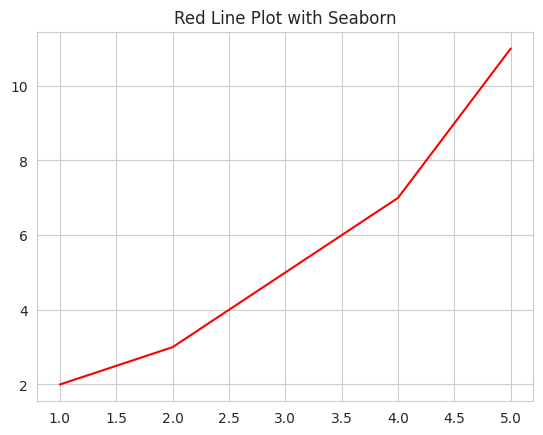

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# 使用 Seaborn 绘制折线图，设置线条颜色为红色
sns.lineplot(x=x, y=y, color='red')

# 添加标题
plt.title("Red Line Plot with Seaborn")

# 显示图形
plt.show()